<h1>Approximating Contours and Convex Hull</h1>
<b>cv2.approxPolyDP(contour, Approximation Accuracy, Closed)</b>
<ul>
<li>contour – Es el contorno que deseamos aproximar</li>
<li>Approximation Accuracy – Parametro importante, determina la precision de la aproximación. Valores pequeños dan aproximaciones precisas, valores altos dan aproximaciones más genericas. Una buena regla para seguir es que sea menos del 5% del valor del contorno del perimetro.</li>
<li>Closed – Un booleano que indica si la aproximacion debe estar cerrada o abierta.</li>
</ul>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

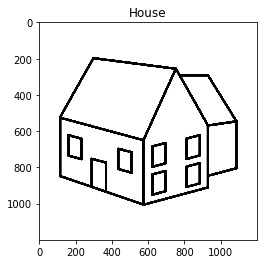

In [2]:

image = cv2.imread('casa.jpg'); orig_image = image.copy()

plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
plt.title('House')

plt.show()

In [3]:
# Escala de grises y binarizacion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Hallar contornos
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

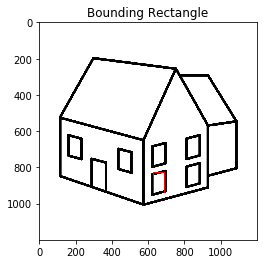

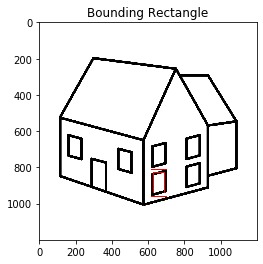

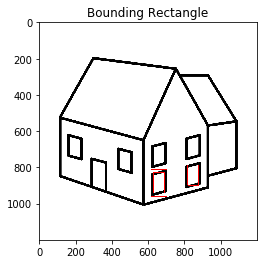

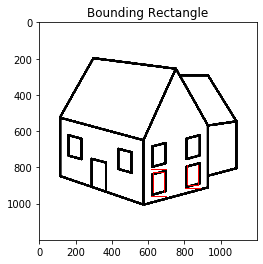

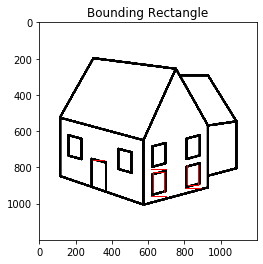

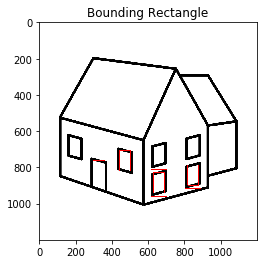

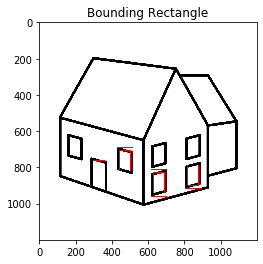

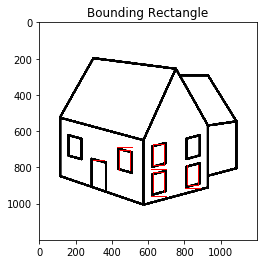

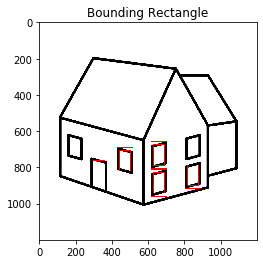

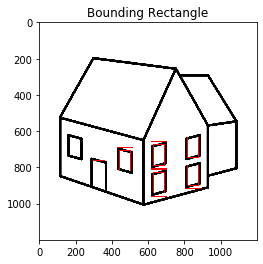

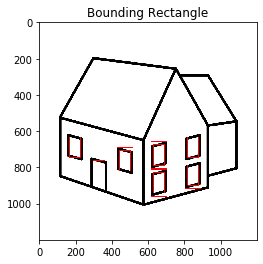

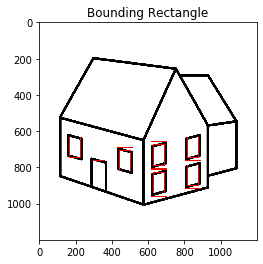

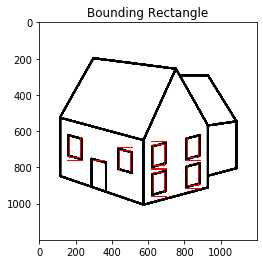

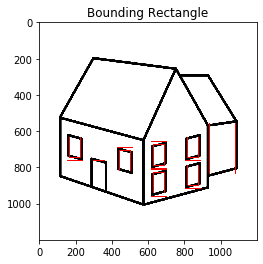

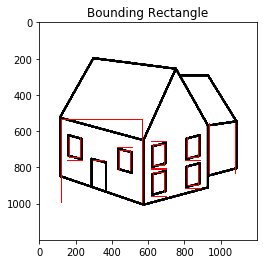

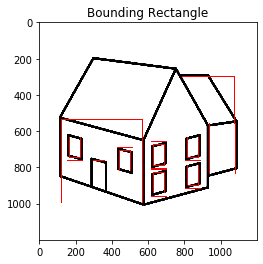

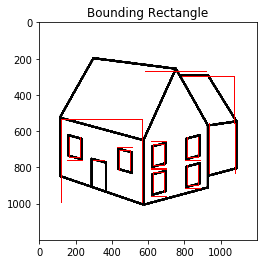

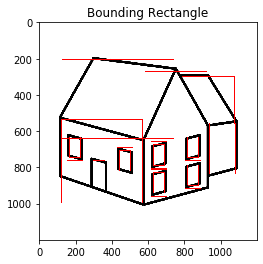

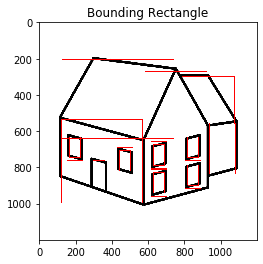

In [4]:
# Iterar sobre cada contorno y calcular los limites rectangulo
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    
    plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    plt.title('Bounding Rectangle'); plt.show()

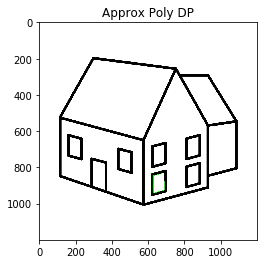

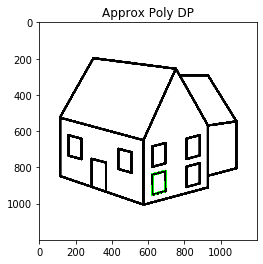

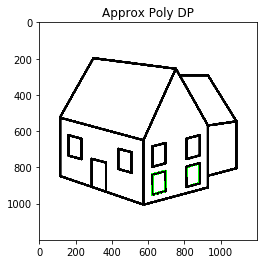

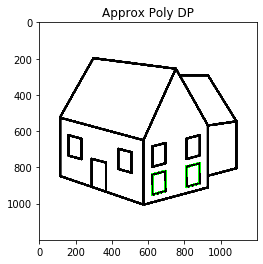

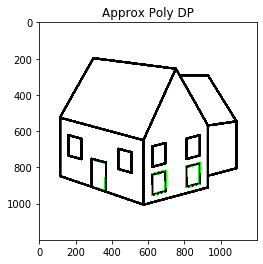

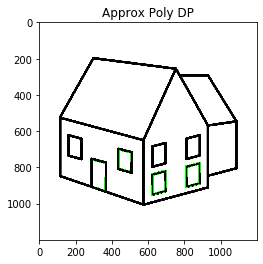

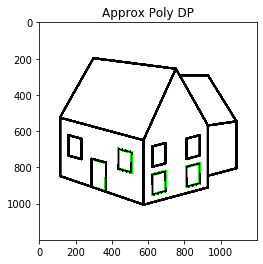

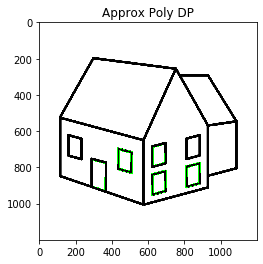

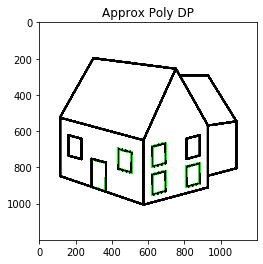

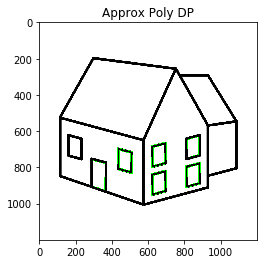

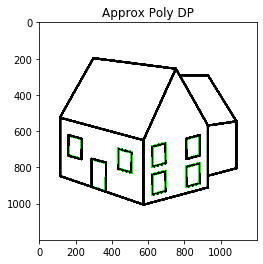

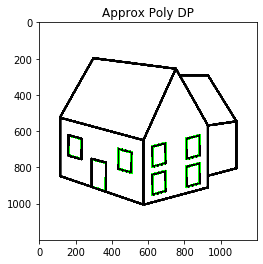

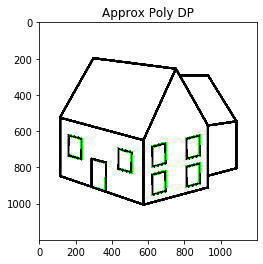

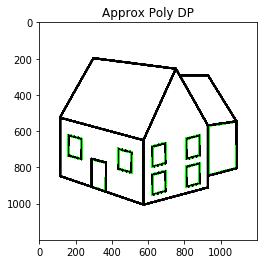

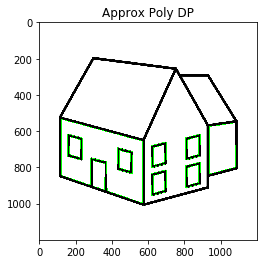

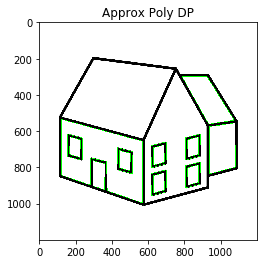

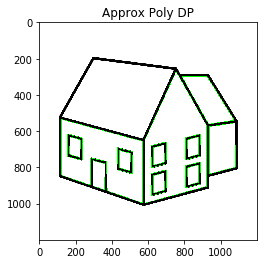

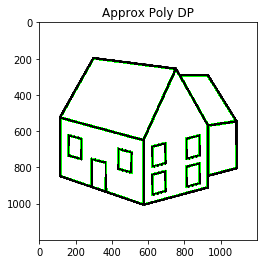

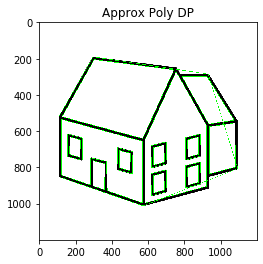

In [5]:
# Iterar sobre cada contorno y calcular el contorno aproximado
for c in contours:
    # Calcular precisión como el porcentaje del perimetro del controno
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Approx Poly DP'); plt.show()

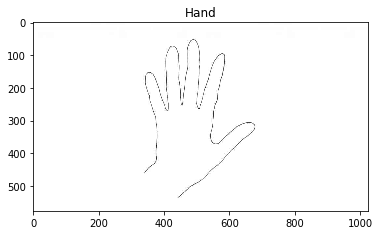

In [6]:
image = cv2.imread('hand.jpg'); orig_image = image.copy()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hand')

plt.show()

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold 
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Contornos
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Ordenar contornos por area y eliminar los mas grandes
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

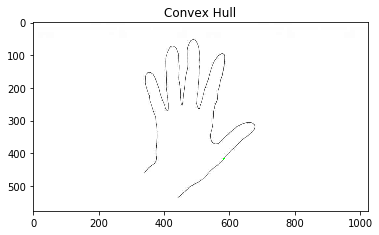

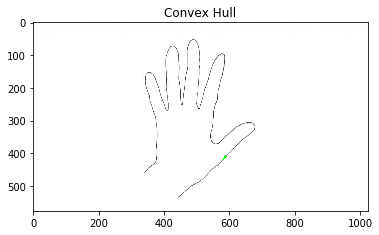

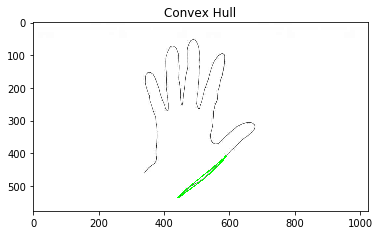

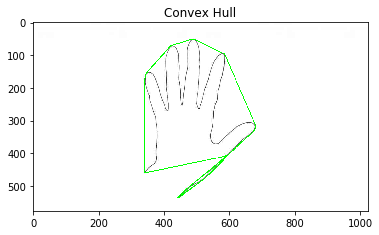

In [8]:
# Iterar sobre los contornos y dibujar el convex hull (casco convexo?)
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Convex Hull'); plt.show()
    cv2.imwrite('convexHull.jpg', image)